In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
file_path = r"C:\Users\kumar\Desktop\data analyst project\project row data\PROJECT 1\Sample - Superstore.csv"
df = pd.read_csv(file_path, encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,4242000%,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,4242000%,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,06-12-2016,6-16-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,9003600%,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,3331100%,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,3331100%,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [ ]:
print("Total Rows: ",df.shape[0])
print("Total Columns: ",df.shape[1])

Total Rows:  9994
Total Columns:  21


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,2016-11
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,2016-11
2,3,CA-2016-138688,2016-06-12,6-16-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,2016-06
3,4,US-2015-108966,2015-10-11,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,2015-10
4,5,US-2015-108966,2015-10-11,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,2015-10


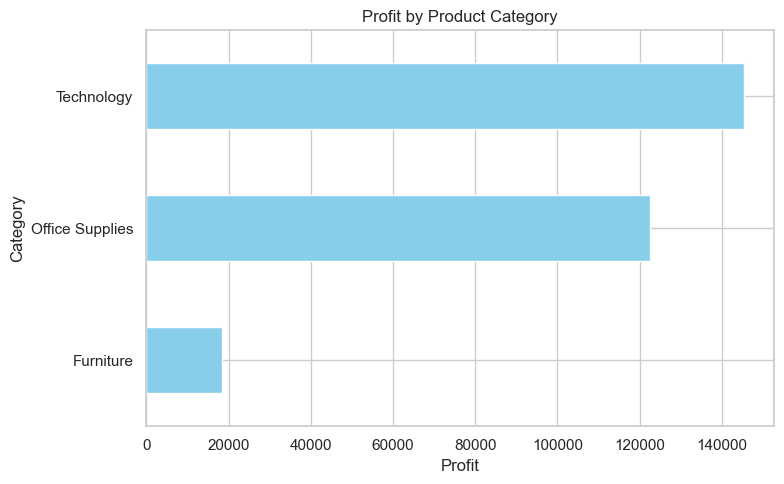

In [ ]:
profit_by_cat = df.groupby('Category')['Profit'].sum().sort_values()

plt.figure(figsize=(8, 5))
profit_by_cat.plot(kind='barh', color='skyblue')
plt.title('Profit by Product Category')
plt.xlabel('Profit')
plt.tight_layout()
plt.show()

D:\Software\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


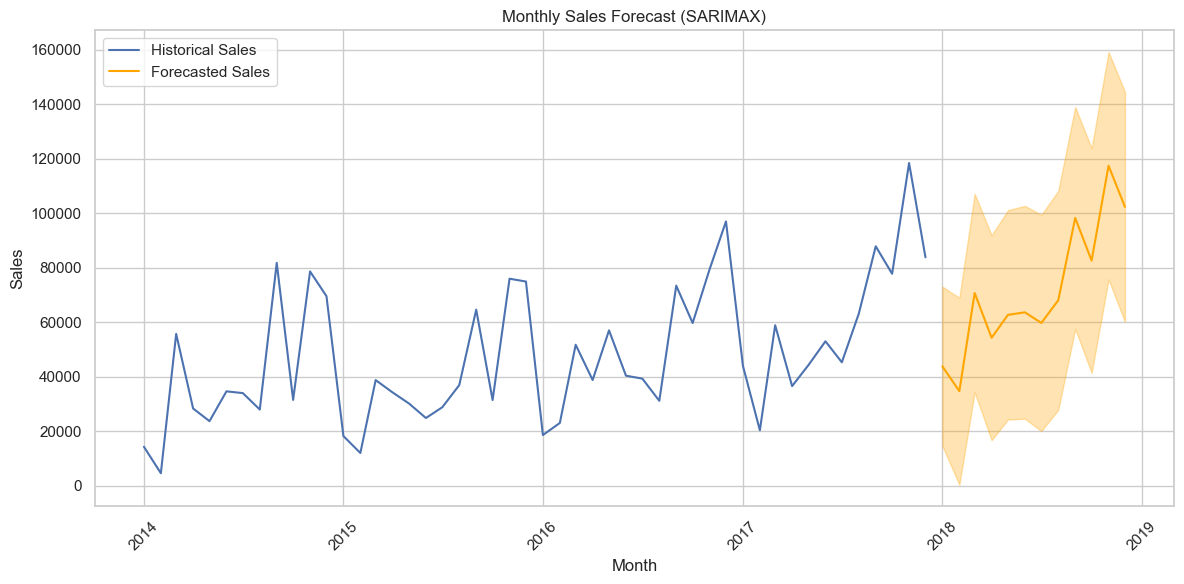

,Month,Forecasted Sales,Lower Bound,Upper Bound
0,2018-01-01 00:00:00,"₹43,780","₹14,522","₹73,038"
1,2018-02-01 00:00:00,"₹34,646",₹315,"₹68,976"
2,2018-03-01 00:00:00,"₹70,715","₹34,267","₹107,163"
3,2018-04-01 00:00:00,"₹54,275","₹16,647","₹91,903"
4,2018-05-01 00:00:00,"₹62,701","₹24,257","₹101,146"
5,2018-06-01 00:00:00,"₹63,612","₹24,510","₹102,714"
6,2018-07-01 00:00:00,"₹59,720","₹20,037","₹99,403"
7,2018-08-01 00:00:00,"₹68,048","₹27,824","₹108,273"
8,2018-09-01 00:00:00,"₹98,286","₹57,542","₹139,030"
9,2018-10-01 00:00:00,"₹82,608","₹41,358","₹123,858"


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare monthly sales data
monthly = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly.index = monthly.index.to_timestamp()

# Train SARIMAX model
model = SARIMAX(monthly, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast next 12 months
n_periods = 12
forecast = results.get_forecast(steps=n_periods)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

# Dates for future predictions
future_dates = pd.date_range(start=monthly.index[-1] + pd.offsets.MonthBegin(1), periods=n_periods, freq='MS')

# Forecast DataFrame
forecast_df = pd.DataFrame({
    'Month': future_dates,
    'Forecasted Sales': pred.values,
    'Lower Bound': conf_int.iloc[:, 0].values,
    'Upper Bound': conf_int.iloc[:, 1].values
})

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly.index, monthly.values, label='Historical Sales')
plt.plot(forecast_df['Month'], forecast_df['Forecasted Sales'], label='Forecasted Sales', color='orange')
plt.fill_between(forecast_df['Month'], forecast_df['Lower Bound'], forecast_df['Upper Bound'],
                 color='orange', alpha=0.3)
plt.title('Monthly Sales Forecast (SARIMAX)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tabular format
forecast_df.style.format({
    'Forecasted Sales': '₹{:,.0f}',
    'Lower Bound': '₹{:,.0f}',
    'Upper Bound': '₹{:,.0f}'
})

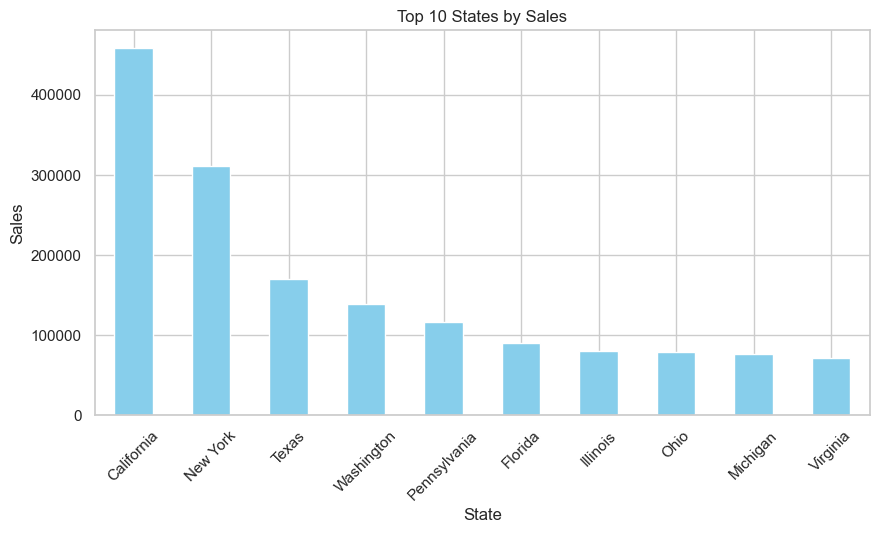

In [ ]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 States by Sales')
plt.ylabel('Sales')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

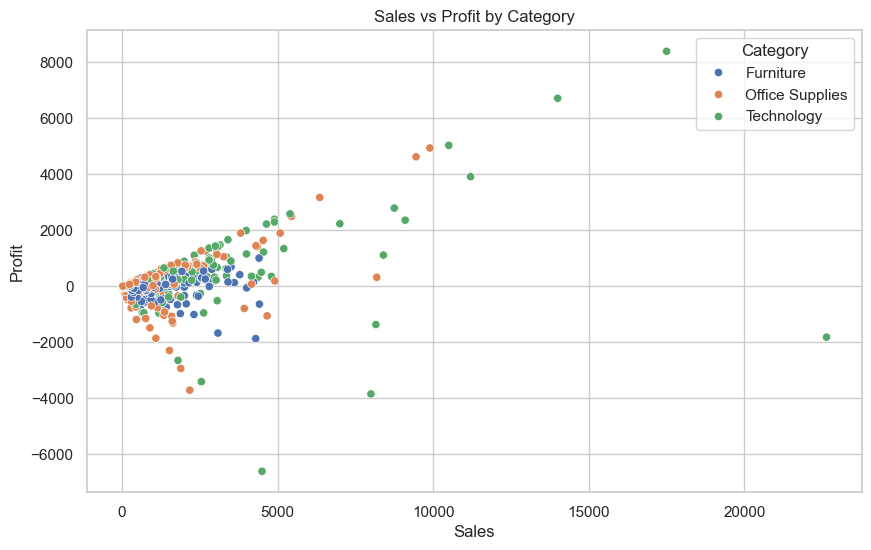

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Sales vs Profit by Category')
plt.show()

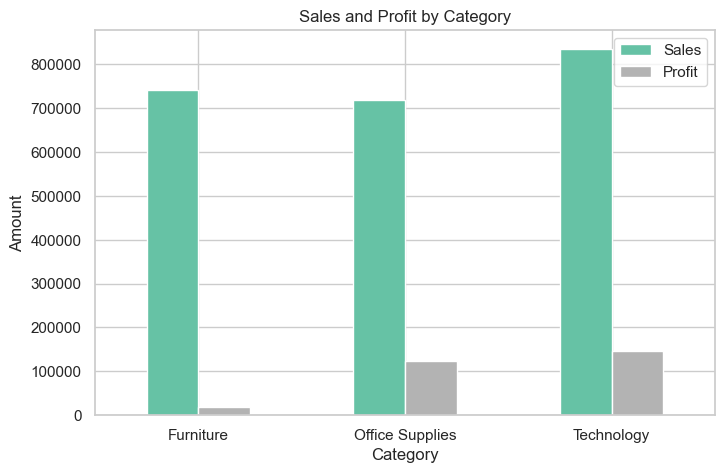

In [ ]:
category_perf = df.groupby('Category')[['Sales', 'Profit']].sum()
category_perf.plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.title('Sales and Profit by Category')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()


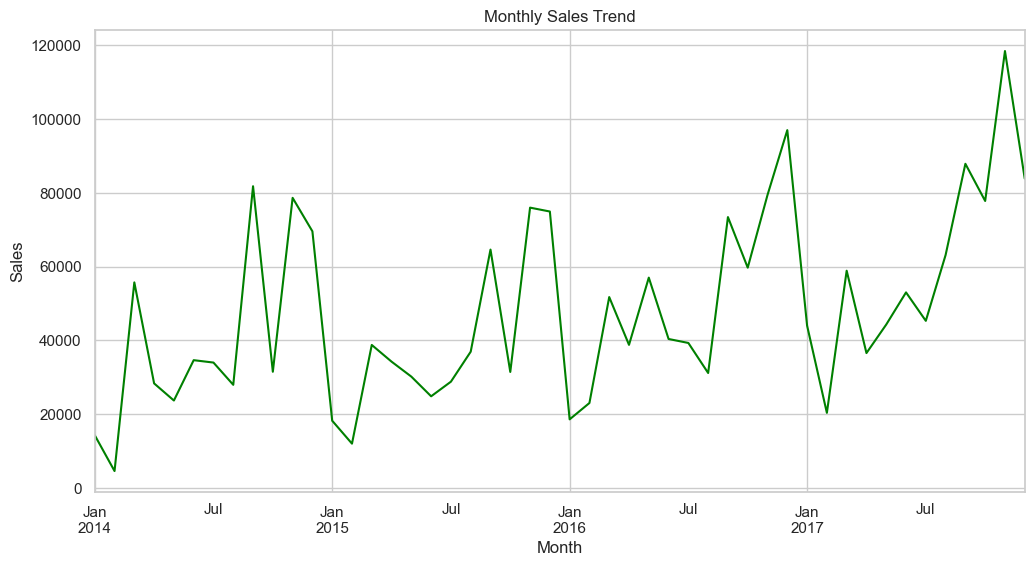

,Month,Sales
0,2014-01,"₹14,237"
1,2014-02,"₹4,520"
2,2014-03,"₹55,691"
3,2014-04,"₹28,295"
4,2014-05,"₹23,648"
5,2014-06,"₹34,595"
6,2014-07,"₹33,946"
7,2014-08,"₹27,909"
8,2014-09,"₹81,777"
9,2014-10,"₹31,453"


In [ ]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

monthly_sales.plot(figsize=(12,6), color='green')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales.style.format({'Sales': '₹{:,.0f}'})

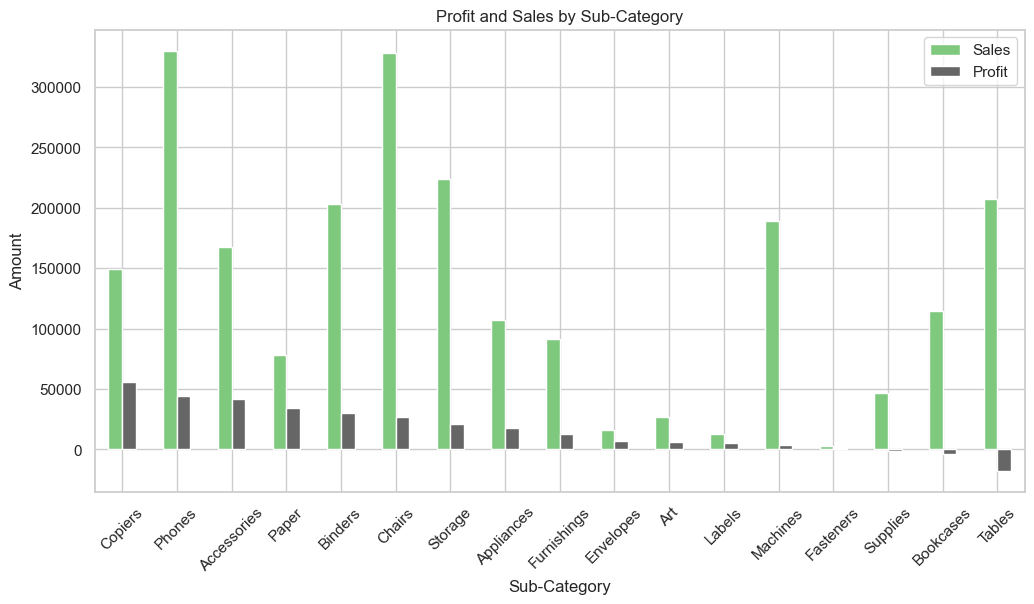

In [ ]:
subcat = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
subcat.plot(kind='bar', figsize=(12,6), colormap='Accent')
plt.title('Profit and Sales by Sub-Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


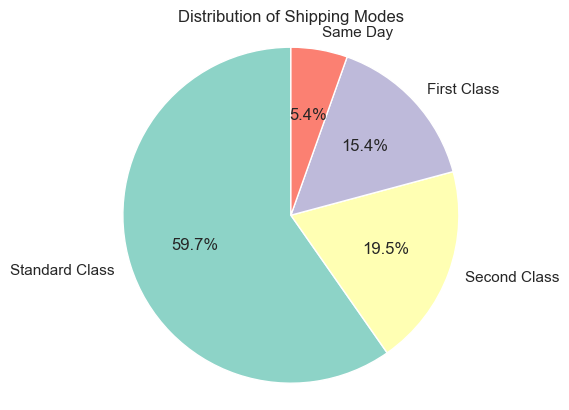

In [ ]:
ship_mode = df['Ship Mode'].value_counts()
plt.pie(ship_mode, labels=ship_mode.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Distribution of Shipping Modes')
plt.axis('equal')
plt.show()


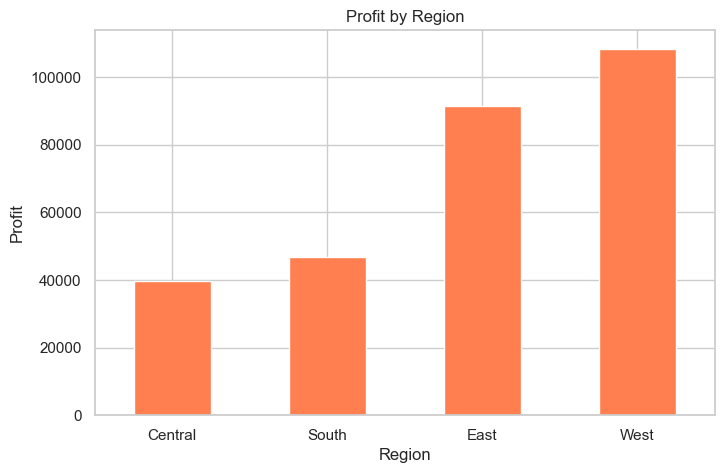

In [ ]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
region_profit.plot(kind='bar', color='coral', figsize=(8,5))
plt.title("Profit by Region")
plt.ylabel("Profit")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [ ]:
loss_orders = df[df['Profit'] < 0]
print("Total Loss-Making Orders:", len(loss_orders))
print(loss_orders[['Order ID', 'Sub-Category', 'Sales', 'Profit']].head())


Total Loss-Making Orders: 1871
          Order ID Sub-Category    Sales   Profit
3   US-2015-108966       Tables   957.58  -383.03
14  US-2015-118983   Appliances    68.81  -123.86
15  US-2015-118983      Binders     2.54    -3.82
23  US-2017-156909       Chairs    71.37    -1.02
27  US-2015-150630    Bookcases  3083.43 -1665.05
